In [18]:
import os
print('Directory is: ', os.getcwd())
from pylab import imshow, show
import mahotas as mh
import mahotas.demos
import numpy as np
import matplotlib.pyplot as plt

Directory is:  C:\Users\johna\Downloads\research


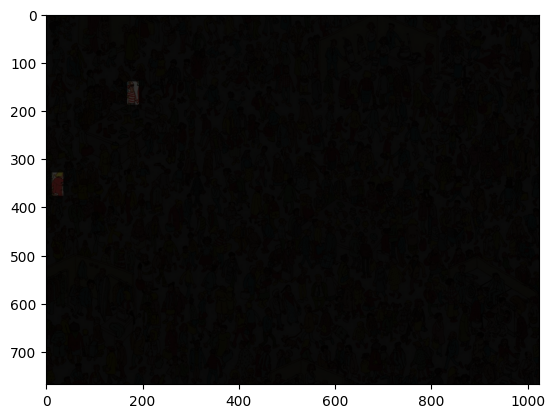

In [19]:
# Where's Waldo?

wally = mahotas.demos.load('Wally')
wfloat = wally.astype(float)

r,g,b = wfloat.transpose((2,0,1))
w = wfloat.mean(2)
pattern = np.ones((24,16), float)

for i in range(2):
    pattern[i::4] = -1
    v = mahotas.convolve(r-w, pattern)
    mask = (v == v.max())
    mask = mahotas.dilate(mask, np.ones((48,24)))
    np.subtract(wally, .8*wally * ~mask[:,:,None], out=wally, casting='unsafe')
imshow(wally)
show()

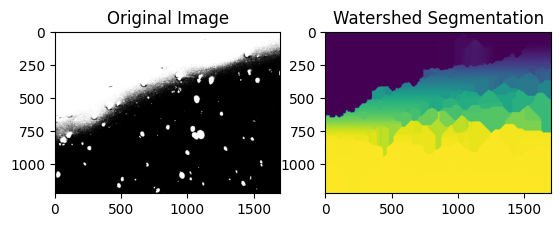

In [21]:
# Watershed

path = r"C:\Users\johna\Downloads\research"
filename = os.path.join(path, 'sample_image_with_uneven_lighting.tif')

img = mh.imread(filename)
if img.ndim == 3:
    img = mh.colors.rgb2grey(img)

# Compute the distance transform
dist = mh.distance(img > img.mean())

# Find local maxima
maxima = mh.regmax(dist)

# Label the maxima
markers, _ = mh.label(maxima)

# Apply the watershed algorithm
watershed_result = mh.cwatershed(-dist, markers)

# Plotting original and watershed images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Watershed Segmentation")
plt.imshow(watershed_result)
plt.show()

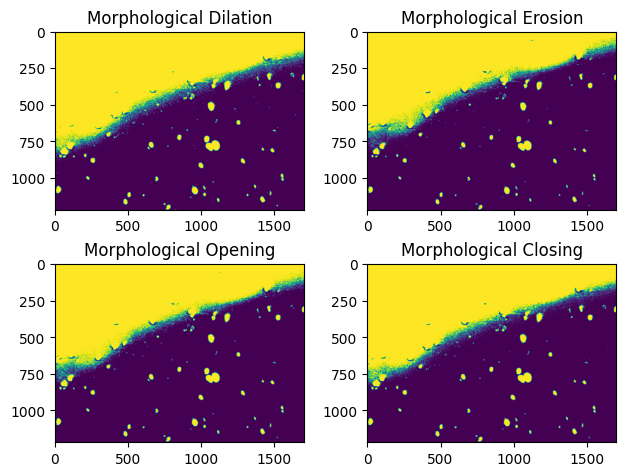

In [34]:
# Morphological Processing

# Dilation
morph_dilate = mh.dilate(img)
plt.subplot(2,2,1)
plt.title("Morphological Dilation")
plt.imshow(morph_dilate)

# Erosion
morph_erode = mh.erode(img)
plt.subplot(2,2,2)
plt.title("Morphological Erosion")
plt.imshow(morph_erode)

# Opening
morph_open = mh.open(img)
plt.subplot(2,2,3)
plt.title("Morphological Opening")
plt.imshow(morph_open)

# Closing
morph_close = mh.close(img)
plt.subplot(2,2,4)
plt.title("Morphological Closing")
plt.imshow(morph_close)

plt.tight_layout()
plt.show()